## Step - 1

### Set Up the Environment

#### We will need Python, Docker, FastAPI or Flask, and the necessary libraries for our exercise.

In [1]:
!pip install fastapi uvicorn #FastAPI: The web framework for creating APIs. Uvicorn: An ASGI server for running FastAPI applications.
!pip install flask


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/Jaymin/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/Users/Jaymin/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/Users/Jaymin/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/Users/Jaymin/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/commands/install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "/Users/Jaymin/opt/anaconda3/lib/python3.9/site-packages/pip/_internal/metadata/pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File

## Step - 2

### Train a Model. 

#### we are using iris dataset here and logistic regression model. we are preprocessing the data, perform a train-test split, and apply hyperparameter tuning with GridSearchCV.


In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import joblib

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
#print(df)
df['species'] = data.target
print(df)
print(df.shape)
X, y = data.data, data.target

print(f"Features: {data.feature_names}")  # Names of the features
print(f"Classes: {data.target_names}") # Names of the targets
for i, class_name in enumerate(data.target_names):
    print(f"{i}: {class_name}")


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with data scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=200))
])

# Parameter Grid and Hyperparameter Tuning
param_grid = {
    'logreg__C': [0.1, 1.0, 10.0],
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate model performance
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy:.2f}")

Best hyperparameters: {'logreg__C': 1.0, 'logreg__solver': 'lbfgs'}
Test accuracy: 1.00


In [17]:
# Save the best model
joblib.dump(best_model, 'Exercise2model.pkl')

['Exercise2model.pkl']

### Now, we'll create api.py file for creating FastAPIs. 
#### Run api.py file on VS code and then run the uvicorn server in the terminal. command is : "uvicorn api:app --reload"
##### Everything is running and we can check the same by POST method of API. Photos of running API is attached in the folder exercise2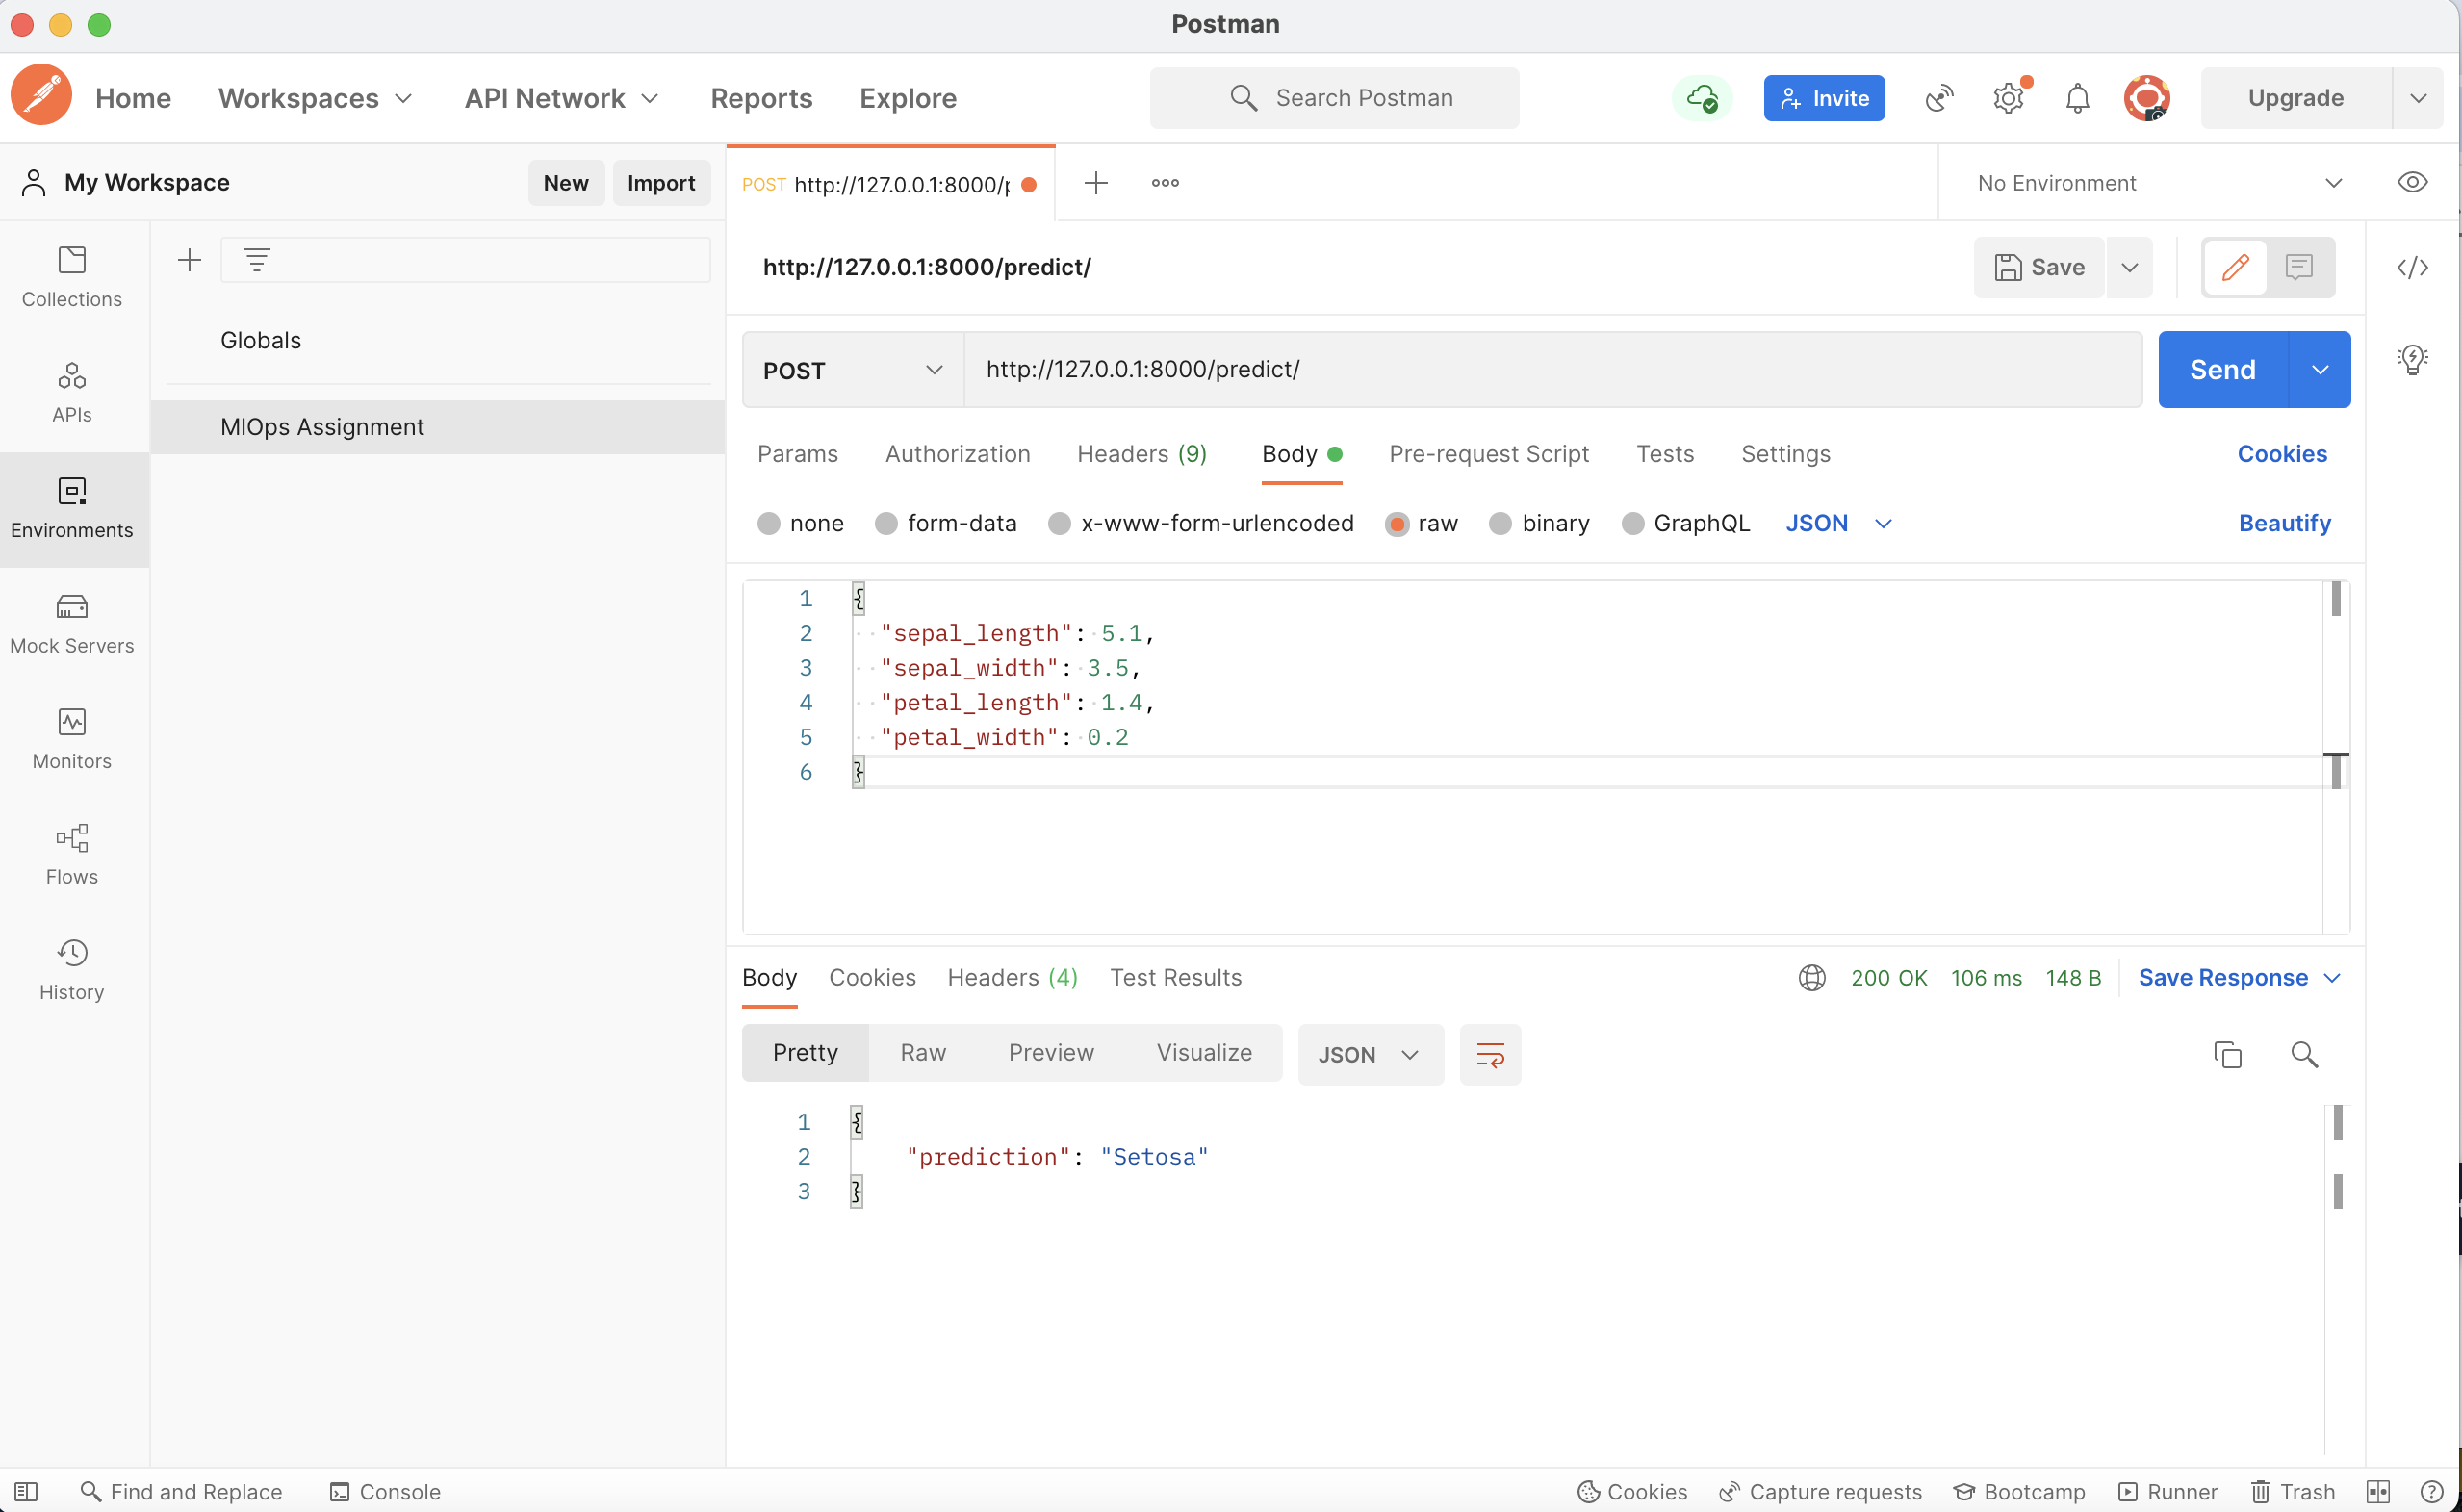

#### Deploying the model using Seldon-core is yet to be completed. 